In [2]:
import pickle
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [6]:
from itertools import combinations
mypath = 'Meshes/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(onlyfiles))
len(list(combinations(onlyfiles,2)))


306


46665

# Loading neuron properties and edgelist

In [19]:
region_of_interest = 'mALT(L)_'
dictionaries = ['areas','bounding_boxes','neuron_maximum_distances','neuron_mean_distances','neuron_median_distances','neuron_minimum_distances','times_distances','volumes']
infile = open('mALT(L)_areas.pkl','rb')
areas = pickle.load(infile)
infile = open('mALT(L)_volumes.pkl','rb')
volumes = pickle.load(infile)
infile = open('mALT(L)_times_distances.pkl','rb')
times_distances = pickle.load(infile)
infile = open('mALT(L)_bounding_boxes.pkl','rb')
bounding_boxes = pickle.load(infile)
infile = open('mALT(L)_neuron_maximum_distances.pkl','rb')
neuron_maximum_distances = pickle.load(infile)
infile = open('mALT(L)_neuron_mean_distances.pkl','rb')
neuron_mean_distances = pickle.load(infile)
infile = open('mALT(L)_neuron_median_distances.pkl','rb')
neuron_median_distances = pickle.load(infile)
infile = open('mALT(L)_neuron_minimum_distances.pkl','rb')
neuron_minimum_distances = pickle.load(infile)

In [22]:
edge_list = pd.read_csv('edge_list_mALT(L)')
edge_list

,bodyId_pre,bodyId_post,roi,weight
0,204962969,297713859,SMP(L),1
1,204962969,328373131,SMP(L),8
2,204962969,419803353,NotPrimary,1
3,204962969,419807685,SMP(L),1
4,204962969,543615199,NotPrimary,1
...,...,...,...,...
1974,5813130061,663298610,NotPrimary,1
1975,5901206628,359066834,NotPrimary,1
1976,5901206628,5813046674,NotPrimary,1
1977,5901206628,5813068453,SMP(L),1


# Other properties, region, neuron type etc.

In [23]:
weighted_edge_list = []
bodyId_pre_weights = {}
bodyId_post_weights = {}
for index,row in edge_list.iterrows():
    edge = (row[0],row[1],row[3])
    weighted_edge_list.append(edge)
    bodyId_pre_weights[row[0]] = row[3]
    bodyId_post_weights[row[1]] = row[3]
    

307


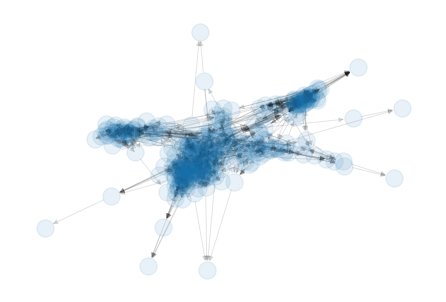

In [24]:
G = nx.DiGraph()
G.add_weighted_edges_from(weighted_edge_list)
print(len(G.nodes()))
nx.draw(G,alpha = 0.1)

# 3 Distances between two neurons - Metagraph

## 3.1 Metagraph based on intesection

In [92]:
import pickle
import matplotlib.pyplot as plt
import networkx as nx

In [85]:
neuron_minimum_distances

{(203598557, 481191030): 14.057938598723288,
 (203598557, 1250920325): 21.48951296872632,
 (203598557, 5812981199): 0.10444451777222023,
 (204962969, 297713859): 0.00866403765150227,
 (204962969, 328373131): 0.0,
 (204962969, 419803353): 0.013908366645795391,
 (204962969, 419807685): 0.03816138842836175,
 (204962969, 481199836): 0.026080234386899166,
 (204962969, 543615199): 0.0,
 (204962969, 761813205): 0.05962660186412383,
 (204962969, 789851418): 0.02808434223191155,
 (204962969, 5813040711): 0.0510209918576887,
 (204962969, 5813068453): 0.7792056841950912,
 (204962969, 5813095998): 0.0,
 (297713859, 327720946): 0.055153698834214775,
 (297713859, 485970020): 0.0}

In [88]:
metagraph_edge_list = []
for edge in neuron_minimum_distances.keys():
    edge = (edge[0],edge[1],neuron_minimum_distances[edge])
    metagraph_edge_list .append(edge)

    

In [89]:
metagraph_edge_list

[(203598557, 481191030, 14.057938598723288),
 (203598557, 1250920325, 21.48951296872632),
 (203598557, 5812981199, 0.10444451777222023),
 (204962969, 297713859, 0.00866403765150227),
 (204962969, 328373131, 0.0),
 (204962969, 419803353, 0.013908366645795391),
 (204962969, 419807685, 0.03816138842836175),
 (204962969, 481199836, 0.026080234386899166),
 (204962969, 543615199, 0.0),
 (204962969, 761813205, 0.05962660186412383),
 (204962969, 789851418, 0.02808434223191155),
 (204962969, 5813040711, 0.0510209918576887),
 (204962969, 5813068453, 0.7792056841950912),
 (204962969, 5813095998, 0.0),
 (297713859, 327720946, 0.055153698834214775),
 (297713859, 485970020, 0.0)]

In [90]:
plt.hist(minimum_distances.values())

NameError: name 'minimum_distances' is not defined

In [17]:
M = nx.DiGraph()
M.add_weighted_edges_from(metagraph_edge_list)

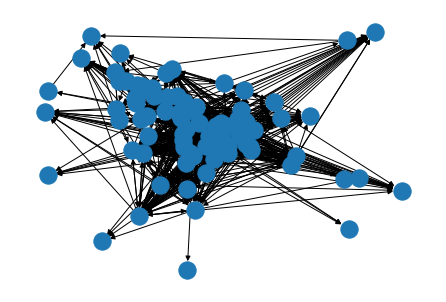

In [18]:
nx.draw(M)

## 3.2 Metagraph based on bounding box weighted distances

3.3 Weighted graph based on minimum distances